# TP : Perceptron multichouche 

Objectifs du TP :

  – découvrir l’apprentissage par perceptron multi-couches .
  
  – utiliser scikit-learn pour déterminer une architecture MLP performante pour un jeu de données.


### 1-Apprentissage par perceptron multi-couches sous sklearn

In [151]:
#import des librairies l'environnement
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

### Question1 :

In [2]:
x= np.array([[0,0], [0,1]])
y=np.array([0,1])

### Question2:

In [3]:
mlp = MLPClassifier(solver='lbfgs',activation='relu', 
            hidden_layer_sizes=(4), random_state=1)

In [4]:
mlp.fit(x, y)

MLPClassifier(hidden_layer_sizes=4, random_state=1, solver='lbfgs')

In [5]:
mlp.predict([[2,2],[-1,-2]])

array([1, 0])

### Question3 :

In [6]:
row=np.array([[1,1],[1,0]])
x=np.append(x,row,axis=0)
y=np.append(y,[0,1],axis=0)

In [7]:
y

array([0, 1, 0, 1])

In [8]:
mlp.fit(x, y)

MLPClassifier(hidden_layer_sizes=4, random_state=1, solver='lbfgs')

In [9]:
mlp.coefs_

[array([[-0.07222344,  3.76233975, -0.43509678, -3.53937686],
        [-0.30746108, -3.80421067, -0.27307681,  3.84889465]]),
 array([[-0.28179514],
        [ 4.76002364],
        [-0.45062052],
        [ 5.57832509]])]

In [10]:
mlp.intercepts_

[array([-0.20646505,  0.12307492, -0.16161097, -0.40162837]),
 array([-9.65245553])]

In [11]:
clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(), random_state=1)

In [12]:
clf.fit(x,y)

MLPClassifier(hidden_layer_sizes=(), random_state=1, solver='lbfgs')

In [13]:
mlp.predict([[2,2],[-1,-2]])

array([0, 1])

In [16]:
print(x)
clf.predict(x)


[[0 0]
 [0 1]
 [1 1]
 [1 0]]


array([1, 0, 0, 1])

- Les prédictions des réseaux obtenus ne sont pas correctes.

In [17]:
clf.intercepts_

[array([0.00073602])]

In [18]:
clf.coefs_

[array([[-7.08348727e-05],
        [-1.01628111e-03]])]

### Question4 :

In [19]:
xx= np.array([[0, 0], [0, 1], [1, 1], [1, 1]])
yy=np.array([0,1,0,0])
print(xx)
print(yy)
print(xx.shape)
yy.shape


[[0 0]
 [0 1]
 [1 1]
 [1 1]]
[0 1 0 0]
(4, 2)


(4,)

### Optimisation des parametres d'architecture MLP 

#### Question5:

- Afin de Déterminez une architecture MLP la plus simple possible pour

  l’apprentissage conjoint de ces deux fonctions,Nous avons utiliser 

  la fonction random.choice pour une generation aleatoire des nombres

  des couches cachées utilisés ainsi que le nombre des neurones

  qu'ils le constituent .

In [20]:
import random
test_score=[]
new_one=[x for x in range(1,256)]
hidden_layer_sizes=[]
dict={}
for i in range (1,21):
    hidden_layer_sizes=[]
    for k in range(1,i+1):
        hidden_layer_sizes.append(random.choice(new_one))
    dict["architecture_ :"+str(i)+"couche_caché et "
         +str(hidden_layer_sizes)+'neurones']=hidden_layer_sizes
dict

{'architecture_ :1couche_caché et [192]neurones': [192],
 'architecture_ :2couche_caché et [52, 160]neurones': [52, 160],
 'architecture_ :3couche_caché et [174, 176, 89]neurones': [174, 176, 89],
 'architecture_ :4couche_caché et [51, 132, 1, 137]neurones': [51,
  132,
  1,
  137],
 'architecture_ :5couche_caché et [72, 41, 178, 100, 1]neurones': [72,
  41,
  178,
  100,
  1],
 'architecture_ :6couche_caché et [219, 83, 231, 112, 222, 203]neurones': [219,
  83,
  231,
  112,
  222,
  203],
 'architecture_ :7couche_caché et [245, 115, 45, 34, 161, 51, 175]neurones': [245,
  115,
  45,
  34,
  161,
  51,
  175],
 'architecture_ :8couche_caché et [100, 123, 130, 135, 222, 20, 35, 44]neurones': [100,
  123,
  130,
  135,
  222,
  20,
  35,
  44],
 'architecture_ :9couche_caché et [234, 75, 130, 188, 199, 193, 62, 77, 144]neurones': [234,
  75,
  130,
  188,
  199,
  193,
  62,
  77,
  144],
 'architecture_ :10couche_caché et [88, 4, 254, 143, 24, 192, 241, 105, 47, 131]neurones': [88,
  4

- Nous avons garder les architectures obtenue , ensuite nous avons fait 

  l'apprentissage sur chacune d'eux et ona stocker tous les scores obtenus.

In [21]:
for i in dict.keys():    
    clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(dict[i]), 
                        random_state=1) 
    print(dict[i])
    clf.fit(xx,yy)
    clf.predict(xx)
    test_score.append(clf.score(xx,yy))
test_score    

[192]
[52, 160]
[174, 176, 89]
[51, 132, 1, 137]
[72, 41, 178, 100, 1]
[219, 83, 231, 112, 222, 203]
[245, 115, 45, 34, 161, 51, 175]
[100, 123, 130, 135, 222, 20, 35, 44]
[234, 75, 130, 188, 199, 193, 62, 77, 144]
[88, 4, 254, 143, 24, 192, 241, 105, 47, 131]
[222, 30, 129, 156, 222, 80, 205, 19, 85, 117, 72]
[89, 247, 213, 72, 186, 7, 136, 145, 240, 224, 164, 132]
[126, 37, 169, 28, 32, 37, 186, 232, 160, 134, 182, 90, 241]
[93, 13, 95, 71, 255, 60, 69, 58, 174, 24, 163, 167, 99, 161]
[36, 217, 49, 4, 29, 210, 78, 37, 176, 114, 103, 197, 174, 10, 63]
[161, 177, 34, 188, 134, 189, 169, 124, 175, 201, 31, 134, 137, 214, 63, 107]
[187, 199, 181, 26, 144, 177, 165, 167, 58, 110, 21, 60, 11, 162, 94, 248, 149]
[164, 182, 71, 132, 107, 196, 99, 24, 237, 201, 43, 120, 122, 212, 14, 140, 252, 80]
[110, 78, 231, 207, 93, 236, 74, 101, 180, 143, 196, 178, 92, 115, 216, 203, 160, 174, 147]
[34, 34, 43, 147, 169, 89, 34, 16, 175, 39, 172, 88, 195, 9, 213, 130, 35, 106, 34, 23]


[1.0,
 1.0,
 1.0,
 1.0,
 0.75,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.75,
 0.75,
 1.0,
 0.75,
 0.75,
 0.75]

Nous avons visualiser l'architecture qui nous a rammené le meilleure score

Text(0, 0.5, 'score de test')

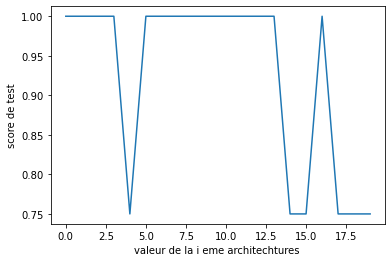

In [22]:
import matplotlib.pyplot as plt
plt.plot(range(len(test_score)), test_score)
plt.xlabel('valeur de la i eme architechtures ')
plt.ylabel('score de test')

la fonction qui nous retourne l'architecture du i eme architecture choisie

In [23]:
def get_architecture_via_indice(k):
    print(test_score[k])
    return(list(dict.keys())[k]) 
# Example :
get_architecture_via_indice(13)

1.0


'architecture_ :14couche_caché et [93, 13, 95, 71, 255, 60, 69, 58, 174, 24, 163, 167, 99, 161]neurones'

la fonction qui nous retourne les autres composantes d'architechture choisie.

In [24]:
def get_the_other_components(k):
    dictionnaire={}
    clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(list(dict.values())[k]), random_state=1) 
    clf.fit(xx,yy)
    clf.predict(xx)
    dictionnaire['n_layers_:']=clf.n_layers_
    dictionnaire[' n_outputs_,:']=clf. n_outputs_ 
    dictionnaire['out_activation_:']=clf.out_activation_                    
    dictionnaire['coefs_:']=clf.coefs_
    dictionnaire['intercepts_:']=clf.intercepts_ 
    dictionnaire['classes_:']=clf.classes_ 
    dictionnaire[' loss_:']=clf.loss_ 
    dictionnaire['n_iter_ :']=clf.n_iter_
    
    return dictionnaire                                           
#Example                        
get_the_other_components(13)
                       

{'n_layers_:': 16,
 ' n_outputs_,:': 1,
 'out_activation_:': 'logistic',
 'coefs_:': [array([[-3.97456206e-02,  3.36519000e-02, -2.39440159e-01,
          -1.17505612e-01, -1.69200356e-01, -1.95265690e-01,
          -2.10254410e-01, -7.41518695e-02, -2.24172059e-02,
          -1.80168476e-01, -3.87050104e-02,  1.21985461e-01,
          -1.44141508e-01,  1.05369919e-01, -2.99617054e-01,
           1.11793709e-01, -4.28064190e-01,  2.81118343e-02,
          -1.72251020e-01, -1.37058851e-01,  9.12905929e-02,
           3.05345873e-01,  3.70826403e-02,  3.02010863e-01,
           1.09267300e-01,  1.08447811e-01, -1.98759626e-01,
          -2.20788097e-01, -1.58147890e-01,  1.81441861e-01,
          -1.92387805e-01, -1.49540328e-01,  3.81009340e-01,
           1.58858361e-02, -3.57452710e-02, -8.83661471e-02,
           8.93320583e-02, -9.18833613e-02, -2.26510270e-01,
          -1.50450951e-02,  1.79662778e-01,  2.40642770e-01,
          -1.05078896e-01,  1.35988434e-01, -1.90050730e-01,
 

#### Sauvegarder cette architecture en un fichier

In [25]:
#Sauvgarde
filehandler = open("ficher des composantes d'architecture MLP", 'wt')
data = str(get_the_other_components(13))
filehandler.write(data)

41026

### Travail sur le jeu de données Iris

### Question 1:

Chargement du jeu de données. Toutes les expériences à venir devront être faites en train/test
split

In [31]:
#chargement de base de données iris
iris = datasets.load_iris()

In [32]:
X=iris.data
y=iris.target

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Question 2:

- Apprendre cinq modèles de classification des données Iris,

  avec des réseaux qui ont respecti-vement
  
  de 1 à 5 couches cachées, et des tailles de couches 
  
  entre 10 et 300 au choix.

In [34]:
import random
new_one=[x for x in range(10,251)]
hidden_layer_sizes=[]
dict2={}
for i in range (1,6):
    hidden_layer_sizes=[]
    for k in range(1,i+1):
        hidden_layer_sizes.append(random.choice(new_one))
    dict2["architecture_ :"+str(i)+"couche_caché et "
          +str(hidden_layer_sizes)+'neurones']=hidden_layer_sizes


Nous avons entrainné chacune de ces architectures par le classifier MLP et le solver lbfgs

In [36]:
import time
test_score2=[]
for i in dict2.keys():  
    start_time = time.time()
    clf = MLPClassifier(solver='lbfgs', 
        hidden_layer_sizes=(dict2[i]),random_state=1) 
    print(dict2[i])
    clf.fit(X_train,y_train)
    clf.predict(X_test)
    test_score2.append(clf.score(X_test, y_test))
    end_time = time.time()
    print('temps ecoule = '+str(end_time - start_time))
test_score2  

[237]
temps ecoule = 0.06856727600097656
[34, 188]
temps ecoule = 0.26741743087768555
[93, 142, 231]
temps ecoule = 0.6524429321289062
[140, 29, 250, 25]
temps ecoule = 0.37139391899108887
[130, 26, 199, 138, 228]
temps ecoule = 1.8955600261688232


[0.9555555555555556,
 0.9777777777777777,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556]

Nous avons obtenue des bonnes resultats avec une marge de temps ecoulé importante a minimiser

### Question 3:

In [37]:
from sklearn import svm
start_time = time.time()
clsvm = svm.SVC(kernel='poly') 
clsvm.fit(X_train,y_train)
clsvm.predict(X_test)
score=clsvm.score(X_test, y_test)
print(score)
end_time = time.time()
print('temps ecoule = '+str(end_time - start_time))

0.9777777777777777
temps ecoule = 0.0013568401336669922


SVM nous a ramené des bon resultas avec moin de temps expiré que la methode de MLP .

* Une astuce classique lorsque l'on programme des réseaux de neurones, 

  est de précéder l’apprentissage du modéle par la normalisation des

  valeurs d'entrées. Le principe est de ramener toutes les 

  entrées dans un méme intervalle fermé, tout en respectant 

  les distributions de probabilités de ces entrées. 
  

* Ceprocessus de normalisation permet de considérer toutes 

  ces valeurs à égale importance. Attention,la normalisation 
  
  doit se faire autant sur les données d'apprentissage que sur 
  
  les donn´ees de test.

### Question 1 :

In [38]:
#Le processus de normalisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Résultat Aprés normalisation :

###### a- Methode MLP 

In [39]:
import random
new_one=[x for x in range(10,251)]
hidden_layer_sizes=[]
dict2={}
for i in range (1,6):
    hidden_layer_sizes=[]
    for k in range(1,i+1):
        hidden_layer_sizes.append(random.choice(new_one))
    dict2["architecture_ :"+str(i)+"couche_caché et "+str(hidden_layer_sizes)+'neurones']=hidden_layer_sizes


In [40]:
test_score2=[]
for i in dict2.keys():  
    start_time = time.time()
    clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(dict2[i]), random_state=1) 
    print(dict2[i])
    clf.fit(X_train,y_train)
    clf.predict(X_test)
    test_score2.append(clf.score(X_test, y_test))
    end_time = time.time()
    print('temps ecoule = '+str(end_time - start_time))
    print(clf.n_iter_)
test_score2  

[148]
temps ecoule = 0.058690547943115234
44
[155, 210]
temps ecoule = 0.5867509841918945
62
[246, 13, 114]
temps ecoule = 0.34331178665161133
106
[93, 149, 112, 138]
temps ecoule = 0.4953324794769287
37
[66, 150, 14, 152, 113]
temps ecoule = 0.44420337677001953
56


[0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9555555555555556,
 0.9555555555555556]

- nous a avons eu des resultats beaucoup mieux , 

  tout en evittant les overfittng dans un court laps de temps.

###### b- Methode SVM

In [41]:
from sklearn import svm
clsvm = svm.SVC(kernel='poly')
start_time = time.time()
clsvm = svm.SVC(kernel='poly') 
clsvm.fit(X_train,y_train)
clsvm.predict(X_test)
score=clsvm.score(X_test, y_test)
print(score)
end_time = time.time()
print('temps ecoule = '+str(end_time - start_time))


0.9333333333333333
temps ecoule = 0.0036575794219970703


Le resultats obtenue aprés la normalisation et plus faible qu'avant la normalisation pour le SVM 

### Pour terminer, nous allons maintenant étudier 

### la convergence des algorithmes d'optimisation 

### disponibles : L-BFGS, SGD et Adam.

#### a- solveur sgd

In [42]:
test_score3=[]
nmbr_iteration=[]
temps=[]
dictresultat={}
j=0
for i in dict2.keys():  
    start_time = time.time()
    clf_sgd = MLPClassifier(solver='sgd',
            hidden_layer_sizes=(dict2[i]), random_state=1) 
    print(dict2[i])
    clf_sgd.fit(X_train,y_train)
    clf_sgd.predict(X_test)
    test_score3.append(clf_sgd.score(X_test, y_test))
    end_time = time.time()
    print('temps ecoule = '+str(end_time - start_time))
    print(clf_sgd.n_iter_)
    temps.append(end_time - start_time)
    nmbr_iteration.append(clf_sgd.n_iter_)
    dictresultat['architecture_'+str(j)]=dict2[i]
    j=j+1
print(" les valeurs des scores obtenue :" ,test_score3)
dictresultat

[148]
temps ecoule = 0.09891343116760254
200
[155, 210]


/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


temps ecoule = 0.28746891021728516
200
[246, 13, 114]


/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


temps ecoule = 0.2290019989013672
200
[93, 149, 112, 138]


/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


temps ecoule = 0.36443114280700684
200
[66, 150, 14, 152, 113]
temps ecoule = 0.36737775802612305
200
 les valeurs des scores obtenue : [0.8222222222222222, 0.8888888888888888, 0.7111111111111111, 0.8888888888888888, 0.8444444444444444]


/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{'architecture_0': [148],
 'architecture_1': [155, 210],
 'architecture_2': [246, 13, 114],
 'architecture_3': [93, 149, 112, 138],
 'architecture_4': [66, 150, 14, 152, 113]}

Nous avons affiché les résultats sous forme du tableau suivant:

In [47]:
import pandas as pd
ar = np.array([test_score3, nmbr_iteration, temps])
df = pd.DataFrame(ar, index = ['performances', "nombre d'itérations", 
       'temps de convergence'], columns = ['MDL1_SGD', 'MDL2_SGD', 
       'MDL3_SGD', 'MDL4_SGD','MDL5_SGD'])
df

,MDL1_SGD,MDL2_SGD,MDL3_SGD,MDL4_SGD,MDL5_SGD
performances,0.822222,0.888889,0.711111,0.888889,0.844444
nombre d'itérations,200.000000,200.000000,200.000000,200.000000,200.000000
temps de convergence,0.098913,0.287469,0.229002,0.364431,0.367378


#### b-solveur adam

In [48]:
test_score4=[]
nmbr_iteration1=[]
temps1=[]
for i in dictresultat.keys():  
    start_time = time.time()
    clf_adam = MLPClassifier(solver='adam',
        hidden_layer_sizes=(dictresultat[i]), random_state=1) 
    print(dictresultat[i])
    clf_adam.fit(X_train,y_train)
    clf_adam.predict(X_test)
    test_score4.append(clf_adam.score(X_test, y_test))
    end_time = time.time()
    print('temps ecoule = '+str(end_time - start_time))
    temps1.append(end_time - start_time)
    nmbr_iteration1.append(clf_adam.n_iter_)
    print(clf_adam.n_iter_)
test_score4  

[148]
temps ecoule = 0.10215902328491211
200
[155, 210]


/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


temps ecoule = 0.29534077644348145
200
[246, 13, 114]


/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


temps ecoule = 0.2654283046722412
200
[93, 149, 112, 138]
temps ecoule = 0.23934698104858398
121
[66, 150, 14, 152, 113]
temps ecoule = 0.27694225311279297
124


[0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556]

Nous avons affiché les résultats sous forme du tableau suivant:

In [50]:
ar1 = np.array([test_score4, nmbr_iteration1, temps1])
df1 = pd.DataFrame(ar1, index = ['performances', "nombre d'itérations", 
'temps de convergence'], columns = ['MDL1_adam', 'MDL2_adam',
            'MDL3_adam', 'MDL4_adam','MDL5_adam'])
df1

,MDL1_adam,MDL2_adam,MDL3_adam,MDL4_adam,MDL5_adam
performances,0.955556,0.955556,0.955556,0.955556,0.955556
nombre d'itérations,200.000000,200.000000,200.000000,121.000000,124.000000
temps de convergence,0.102159,0.295341,0.265428,0.239347,0.276942


#### c-solveur MLP 

In [51]:
test_score2=[]
nmbr_iteration2=[]
temps2=[]
for i in dictresultat.keys():  
    start_time = time.time()
    clf = MLPClassifier(solver='lbfgs',
        hidden_layer_sizes=(dictresultat[i]), random_state=1) 
    print(dictresultat[i])
    clf.fit(X_train,y_train)
    clf.predict(X_test)
    test_score2.append(clf.score(X_test, y_test))
    end_time = time.time()
    print('temps ecoule = '+str(end_time - start_time))
    temps2.append(end_time - start_time)
    nmbr_iteration2.append(clf_sgd.n_iter_)
    print(clf.n_iter_)
test_score2 

[148]
temps ecoule = 0.059162139892578125
44
[155, 210]
temps ecoule = 0.37215542793273926
62
[246, 13, 114]
temps ecoule = 0.2191147804260254
106
[93, 149, 112, 138]
temps ecoule = 0.27084946632385254
37
[66, 150, 14, 152, 113]
temps ecoule = 0.40930652618408203
56


[0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9555555555555556,
 0.9555555555555556]

Nous avons affiché les résultats sous forme du tableau suivant:

In [52]:
ar3 = np.array([test_score2, nmbr_iteration2, temps2])
df3 = pd.DataFrame(ar3, index = ['performances', "nombre d'itérations",
    'temps de convergence'], columns = ['MDL1_MLP', 'MDL2_MLP',
                'MDL3_MLP', 'MDL4_MLP','MDL5_MLP'])
df3

,MDL1_MLP,MDL2_MLP,MDL3_MLP,MDL4_MLP,MDL5_MLP
performances,0.977778,0.977778,0.977778,0.955556,0.955556
nombre d'itérations,200.000000,200.000000,200.000000,200.000000,200.000000
temps de convergence,0.059162,0.372155,0.219115,0.270849,0.409307


#### Le Résultat final est le suivant :

In [53]:
frames = (df1, df, df3)
result = pd.concat(frames,axis=1)
result

,MDL1_adam,MDL2_adam,MDL3_adam,MDL4_adam,MDL5_adam,MDL1_SGD,MDL2_SGD,MDL3_SGD,MDL4_SGD,MDL5_SGD,MDL1_MLP,MDL2_MLP,MDL3_MLP,MDL4_MLP,MDL5_MLP
performances,0.955556,0.955556,0.955556,0.955556,0.955556,0.822222,0.888889,0.711111,0.888889,0.844444,0.977778,0.977778,0.977778,0.955556,0.955556
nombre d'itérations,200.000000,200.000000,200.000000,121.000000,124.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
temps de convergence,0.102159,0.295341,0.265428,0.239347,0.276942,0.098913,0.287469,0.229002,0.364431,0.367378,0.059162,0.372155,0.219115,0.270849,0.409307


pour le meilleur modéle obtenue pour le solver :

    - adam : MDL1_adam
    - sgd :  MDL2_SGD
    - lbfgs : MDL1_MLP
        
parmis ces Resultas on va choisir 

l'architecture : MDL1_MLP ( bon score et moins de temps )     

### Amélioration des modéles :


#### a- sgd solver 

In [54]:
test_scorek=[]
nmbr_iterationk=[]
tempsk=[]
dictresultatk={}
k=0
indi_j=[]
for i in dictresultat.keys(): 
    for j in range(11,1,-1):
        start_time = time.time()
        clf_sgd = MLPClassifier(solver='sgd', hidden_layer_sizes=(dictresultat[i]), random_state=1,learning_rate_init=j) 
        print(dictresultat[i])
        clf_sgd.fit(X_train,y_train)
        clf_sgd.predict(X_test)
        test_scorek.append(clf_sgd.score(X_test, y_test))
        end_time = time.time()
        print('temps ecoule = '+str(end_time - start_time))
        print(clf_sgd.n_iter_)
        tempsk.append(end_time - start_time)
        nmbr_iterationk.append(clf_sgd.n_iter_)
        dictresultatk['architecture_'+str(j)]=dictresultat[i]
        k=k+1
        indi_j.append(j)
        print(" les valeurs des scores obtenue :" ,test_scorek)
dictresultatk 

[148]
temps ecoule = 0.008189678192138672
12
 les valeurs des scores obtenue : [0.26666666666666666]
[148]
temps ecoule = 0.007681846618652344
12
 les valeurs des scores obtenue : [0.26666666666666666, 0.4]
[148]
temps ecoule = 0.007369518280029297
12
 les valeurs des scores obtenue : [0.26666666666666666, 0.4, 0.4]
[148]
temps ecoule = 0.007165670394897461
12
 les valeurs des scores obtenue : [0.26666666666666666, 0.4, 0.4, 0.37777777777777777]
[148]
temps ecoule = 0.007749080657958984
13
 les valeurs des scores obtenue : [0.26666666666666666, 0.4, 0.4, 0.37777777777777777, 0.37777777777777777]
[148]
temps ecoule = 0.007674694061279297
13
 les valeurs des scores obtenue : [0.26666666666666666, 0.4, 0.4, 0.37777777777777777, 0.37777777777777777, 0.4]
[148]
temps ecoule = 0.00763249397277832
13
 les valeurs des scores obtenue : [0.26666666666666666, 0.4, 0.4, 0.37777777777777777, 0.37777777777777777, 0.4, 0.4222222222222222]
[148]
temps ecoule = 0.007152080535888672
13
 les valeurs des 

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


temps ecoule = 0.28665614128112793
200
 les valeurs des scores obtenue : [0.26666666666666666, 0.4, 0.4, 0.37777777777777777, 0.37777777777777777, 0.4, 0.4222222222222222, 0.8666666666666667, 0.8444444444444444, 0.9555555555555556, 0.26666666666666666, 0.35555555555555557]
[155, 210]
temps ecoule = 0.015575885772705078
12
 les valeurs des scores obtenue : [0.26666666666666666, 0.4, 0.4, 0.37777777777777777, 0.37777777777777777, 0.4, 0.4222222222222222, 0.8666666666666667, 0.8444444444444444, 0.9555555555555556, 0.26666666666666666, 0.35555555555555557, 0.37777777777777777]
[155, 210]
temps ecoule = 0.015064239501953125
12
 les valeurs des scores obtenue : [0.26666666666666666, 0.4, 0.4, 0.37777777777777777, 0.37777777777777777, 0.4, 0.4222222222222222, 0.8666666666666667, 0.8444444444444444, 0.9555555555555556, 0.26666666666666666, 0.35555555555555557, 0.37777777777777777, 0.13333333333333333]
[155, 210]


/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarnin

temps ecoule = 0.221876859664917
200
 les valeurs des scores obtenue : [0.26666666666666666, 0.4, 0.4, 0.37777777777777777, 0.37777777777777777, 0.4, 0.4222222222222222, 0.8666666666666667, 0.8444444444444444, 0.9555555555555556, 0.26666666666666666, 0.35555555555555557, 0.37777777777777777, 0.13333333333333333, 0.35555555555555557]
[155, 210]
temps ecoule = 0.015694141387939453
12
 les valeurs des scores obtenue : [0.26666666666666666, 0.4, 0.4, 0.37777777777777777, 0.37777777777777777, 0.4, 0.4222222222222222, 0.8666666666666667, 0.8444444444444444, 0.9555555555555556, 0.26666666666666666, 0.35555555555555557, 0.37777777777777777, 0.13333333333333333, 0.35555555555555557, 0.6222222222222222]
[155, 210]
temps ecoule = 0.01585555076599121
12
 les valeurs des scores obtenue : [0.26666666666666666, 0.4, 0.4, 0.37777777777777777, 0.37777777777777777, 0.4, 0.4222222222222222, 0.8666666666666667, 0.8444444444444444, 0.9555555555555556, 0.26666666666666666, 0.35555555555555557, 0.37777777777

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


temps ecoule = 0.23721814155578613
200
 les valeurs des scores obtenue : [0.26666666666666666, 0.4, 0.4, 0.37777777777777777, 0.37777777777777777, 0.4, 0.4222222222222222, 0.8666666666666667, 0.8444444444444444, 0.9555555555555556, 0.26666666666666666, 0.35555555555555557, 0.37777777777777777, 0.13333333333333333, 0.35555555555555557, 0.6222222222222222, 0.35555555555555557, 0.7333333333333333, 0.35555555555555557]
[155, 210]
temps ecoule = 0.018374919891357422
13
 les valeurs des scores obtenue : [0.26666666666666666, 0.4, 0.4, 0.37777777777777777, 0.37777777777777777, 0.4, 0.4222222222222222, 0.8666666666666667, 0.8444444444444444, 0.9555555555555556, 0.26666666666666666, 0.35555555555555557, 0.37777777777777777, 0.13333333333333333, 0.35555555555555557, 0.6222222222222222, 0.35555555555555557, 0.7333333333333333, 0.35555555555555557, 0.26666666666666666]
[246, 13, 114]
temps ecoule = 0.013586997985839844
12
 les valeurs des scores obtenue : [0.26666666666666666, 0.4, 0.4, 0.37777777

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


temps ecoule = 0.308215856552124
200
 les valeurs des scores obtenue : [0.26666666666666666, 0.4, 0.4, 0.37777777777777777, 0.37777777777777777, 0.4, 0.4222222222222222, 0.8666666666666667, 0.8444444444444444, 0.9555555555555556, 0.26666666666666666, 0.35555555555555557, 0.37777777777777777, 0.13333333333333333, 0.35555555555555557, 0.6222222222222222, 0.35555555555555557, 0.7333333333333333, 0.35555555555555557, 0.26666666666666666, 0.26666666666666666, 0.26666666666666666, 0.26666666666666666, 0.35555555555555557, 0.26666666666666666, 0.26666666666666666, 0.37777777777777777, 0.26666666666666666, 0.37777777777777777, 0.37777777777777777, 0.35555555555555557]
[93, 149, 112, 138]


/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


temps ecoule = 0.3364372253417969
200
 les valeurs des scores obtenue : [0.26666666666666666, 0.4, 0.4, 0.37777777777777777, 0.37777777777777777, 0.4, 0.4222222222222222, 0.8666666666666667, 0.8444444444444444, 0.9555555555555556, 0.26666666666666666, 0.35555555555555557, 0.37777777777777777, 0.13333333333333333, 0.35555555555555557, 0.6222222222222222, 0.35555555555555557, 0.7333333333333333, 0.35555555555555557, 0.26666666666666666, 0.26666666666666666, 0.26666666666666666, 0.26666666666666666, 0.35555555555555557, 0.26666666666666666, 0.26666666666666666, 0.37777777777777777, 0.26666666666666666, 0.37777777777777777, 0.37777777777777777, 0.35555555555555557, 0.35555555555555557]
[93, 149, 112, 138]


/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


temps ecoule = 0.3511676788330078
200
 les valeurs des scores obtenue : [0.26666666666666666, 0.4, 0.4, 0.37777777777777777, 0.37777777777777777, 0.4, 0.4222222222222222, 0.8666666666666667, 0.8444444444444444, 0.9555555555555556, 0.26666666666666666, 0.35555555555555557, 0.37777777777777777, 0.13333333333333333, 0.35555555555555557, 0.6222222222222222, 0.35555555555555557, 0.7333333333333333, 0.35555555555555557, 0.26666666666666666, 0.26666666666666666, 0.26666666666666666, 0.26666666666666666, 0.35555555555555557, 0.26666666666666666, 0.26666666666666666, 0.37777777777777777, 0.26666666666666666, 0.37777777777777777, 0.37777777777777777, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557]
[93, 149, 112, 138]


/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


temps ecoule = 0.3120877742767334
200
 les valeurs des scores obtenue : [0.26666666666666666, 0.4, 0.4, 0.37777777777777777, 0.37777777777777777, 0.4, 0.4222222222222222, 0.8666666666666667, 0.8444444444444444, 0.9555555555555556, 0.26666666666666666, 0.35555555555555557, 0.37777777777777777, 0.13333333333333333, 0.35555555555555557, 0.6222222222222222, 0.35555555555555557, 0.7333333333333333, 0.35555555555555557, 0.26666666666666666, 0.26666666666666666, 0.26666666666666666, 0.26666666666666666, 0.35555555555555557, 0.26666666666666666, 0.26666666666666666, 0.37777777777777777, 0.26666666666666666, 0.37777777777777777, 0.37777777777777777, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557]
[93, 149, 112, 138]


/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


temps ecoule = 0.31194162368774414
200
 les valeurs des scores obtenue : [0.26666666666666666, 0.4, 0.4, 0.37777777777777777, 0.37777777777777777, 0.4, 0.4222222222222222, 0.8666666666666667, 0.8444444444444444, 0.9555555555555556, 0.26666666666666666, 0.35555555555555557, 0.37777777777777777, 0.13333333333333333, 0.35555555555555557, 0.6222222222222222, 0.35555555555555557, 0.7333333333333333, 0.35555555555555557, 0.26666666666666666, 0.26666666666666666, 0.26666666666666666, 0.26666666666666666, 0.35555555555555557, 0.26666666666666666, 0.26666666666666666, 0.37777777777777777, 0.26666666666666666, 0.37777777777777777, 0.37777777777777777, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557]
[93, 149, 112, 138]


/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


temps ecoule = 0.31122756004333496
200
 les valeurs des scores obtenue : [0.26666666666666666, 0.4, 0.4, 0.37777777777777777, 0.37777777777777777, 0.4, 0.4222222222222222, 0.8666666666666667, 0.8444444444444444, 0.9555555555555556, 0.26666666666666666, 0.35555555555555557, 0.37777777777777777, 0.13333333333333333, 0.35555555555555557, 0.6222222222222222, 0.35555555555555557, 0.7333333333333333, 0.35555555555555557, 0.26666666666666666, 0.26666666666666666, 0.26666666666666666, 0.26666666666666666, 0.35555555555555557, 0.26666666666666666, 0.26666666666666666, 0.37777777777777777, 0.26666666666666666, 0.37777777777777777, 0.37777777777777777, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557]
[93, 149, 112, 138]


/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


temps ecoule = 0.33125996589660645
200
 les valeurs des scores obtenue : [0.26666666666666666, 0.4, 0.4, 0.37777777777777777, 0.37777777777777777, 0.4, 0.4222222222222222, 0.8666666666666667, 0.8444444444444444, 0.9555555555555556, 0.26666666666666666, 0.35555555555555557, 0.37777777777777777, 0.13333333333333333, 0.35555555555555557, 0.6222222222222222, 0.35555555555555557, 0.7333333333333333, 0.35555555555555557, 0.26666666666666666, 0.26666666666666666, 0.26666666666666666, 0.26666666666666666, 0.35555555555555557, 0.26666666666666666, 0.26666666666666666, 0.37777777777777777, 0.26666666666666666, 0.37777777777777777, 0.37777777777777777, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557]
[93, 149, 112, 138]


/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


temps ecoule = 0.32246899604797363
200
 les valeurs des scores obtenue : [0.26666666666666666, 0.4, 0.4, 0.37777777777777777, 0.37777777777777777, 0.4, 0.4222222222222222, 0.8666666666666667, 0.8444444444444444, 0.9555555555555556, 0.26666666666666666, 0.35555555555555557, 0.37777777777777777, 0.13333333333333333, 0.35555555555555557, 0.6222222222222222, 0.35555555555555557, 0.7333333333333333, 0.35555555555555557, 0.26666666666666666, 0.26666666666666666, 0.26666666666666666, 0.26666666666666666, 0.35555555555555557, 0.26666666666666666, 0.26666666666666666, 0.37777777777777777, 0.26666666666666666, 0.37777777777777777, 0.37777777777777777, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557]
[93, 149, 112, 138]


/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


temps ecoule = 0.33901357650756836
200
 les valeurs des scores obtenue : [0.26666666666666666, 0.4, 0.4, 0.37777777777777777, 0.37777777777777777, 0.4, 0.4222222222222222, 0.8666666666666667, 0.8444444444444444, 0.9555555555555556, 0.26666666666666666, 0.35555555555555557, 0.37777777777777777, 0.13333333333333333, 0.35555555555555557, 0.6222222222222222, 0.35555555555555557, 0.7333333333333333, 0.35555555555555557, 0.26666666666666666, 0.26666666666666666, 0.26666666666666666, 0.26666666666666666, 0.35555555555555557, 0.26666666666666666, 0.26666666666666666, 0.37777777777777777, 0.26666666666666666, 0.37777777777777777, 0.37777777777777777, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557]
[93, 149, 112, 138]


/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


temps ecoule = 0.35129237174987793
200
 les valeurs des scores obtenue : [0.26666666666666666, 0.4, 0.4, 0.37777777777777777, 0.37777777777777777, 0.4, 0.4222222222222222, 0.8666666666666667, 0.8444444444444444, 0.9555555555555556, 0.26666666666666666, 0.35555555555555557, 0.37777777777777777, 0.13333333333333333, 0.35555555555555557, 0.6222222222222222, 0.35555555555555557, 0.7333333333333333, 0.35555555555555557, 0.26666666666666666, 0.26666666666666666, 0.26666666666666666, 0.26666666666666666, 0.35555555555555557, 0.26666666666666666, 0.26666666666666666, 0.37777777777777777, 0.26666666666666666, 0.37777777777777777, 0.37777777777777777, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557]
[66, 150, 14, 152, 113]


/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


temps ecoule = 0.3124356269836426
200
 les valeurs des scores obtenue : [0.26666666666666666, 0.4, 0.4, 0.37777777777777777, 0.37777777777777777, 0.4, 0.4222222222222222, 0.8666666666666667, 0.8444444444444444, 0.9555555555555556, 0.26666666666666666, 0.35555555555555557, 0.37777777777777777, 0.13333333333333333, 0.35555555555555557, 0.6222222222222222, 0.35555555555555557, 0.7333333333333333, 0.35555555555555557, 0.26666666666666666, 0.26666666666666666, 0.26666666666666666, 0.26666666666666666, 0.35555555555555557, 0.26666666666666666, 0.26666666666666666, 0.37777777777777777, 0.26666666666666666, 0.37777777777777777, 0.37777777777777777, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557]
[66, 150, 14, 152, 113]


/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


temps ecoule = 0.31532883644104004
200
 les valeurs des scores obtenue : [0.26666666666666666, 0.4, 0.4, 0.37777777777777777, 0.37777777777777777, 0.4, 0.4222222222222222, 0.8666666666666667, 0.8444444444444444, 0.9555555555555556, 0.26666666666666666, 0.35555555555555557, 0.37777777777777777, 0.13333333333333333, 0.35555555555555557, 0.6222222222222222, 0.35555555555555557, 0.7333333333333333, 0.35555555555555557, 0.26666666666666666, 0.26666666666666666, 0.26666666666666666, 0.26666666666666666, 0.35555555555555557, 0.26666666666666666, 0.26666666666666666, 0.37777777777777777, 0.26666666666666666, 0.37777777777777777, 0.37777777777777777, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557]
[66, 150, 14, 152, 113]


/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


temps ecoule = 0.31468653678894043
200
 les valeurs des scores obtenue : [0.26666666666666666, 0.4, 0.4, 0.37777777777777777, 0.37777777777777777, 0.4, 0.4222222222222222, 0.8666666666666667, 0.8444444444444444, 0.9555555555555556, 0.26666666666666666, 0.35555555555555557, 0.37777777777777777, 0.13333333333333333, 0.35555555555555557, 0.6222222222222222, 0.35555555555555557, 0.7333333333333333, 0.35555555555555557, 0.26666666666666666, 0.26666666666666666, 0.26666666666666666, 0.26666666666666666, 0.35555555555555557, 0.26666666666666666, 0.26666666666666666, 0.37777777777777777, 0.26666666666666666, 0.37777777777777777, 0.37777777777777777, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557]
[66, 150, 14, 152, 113]


/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


temps ecoule = 0.3215212821960449
200
 les valeurs des scores obtenue : [0.26666666666666666, 0.4, 0.4, 0.37777777777777777, 0.37777777777777777, 0.4, 0.4222222222222222, 0.8666666666666667, 0.8444444444444444, 0.9555555555555556, 0.26666666666666666, 0.35555555555555557, 0.37777777777777777, 0.13333333333333333, 0.35555555555555557, 0.6222222222222222, 0.35555555555555557, 0.7333333333333333, 0.35555555555555557, 0.26666666666666666, 0.26666666666666666, 0.26666666666666666, 0.26666666666666666, 0.35555555555555557, 0.26666666666666666, 0.26666666666666666, 0.37777777777777777, 0.26666666666666666, 0.37777777777777777, 0.37777777777777777, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557, 0.35555555555555557]
[66, 150, 14, 152, 113]
temps ecoule = 0.0208084583282470

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{'architecture_11': [66, 150, 14, 152, 113],
 'architecture_10': [66, 150, 14, 152, 113],
 'architecture_9': [66, 150, 14, 152, 113],
 'architecture_8': [66, 150, 14, 152, 113],
 'architecture_7': [66, 150, 14, 152, 113],
 'architecture_6': [66, 150, 14, 152, 113],
 'architecture_5': [66, 150, 14, 152, 113],
 'architecture_4': [66, 150, 14, 152, 113],
 'architecture_3': [66, 150, 14, 152, 113],
 'architecture_2': [66, 150, 14, 152, 113]}

Nous avons affiché les résultats sous forme du tableau suivant:

In [57]:
liste=[]
for i in range(1,51):
    liste.append(" model_sg_"+str(i))   
ark = np.array([test_scorek, nmbr_iterationk, tempsk])
dfk = pd.DataFrame(ark, index = ['performances', "nombre d'itérations", 'temps de convergence'], columns = liste)
dfk

,model_sg_1,model_sg_2,model_sg_3,model_sg_4,model_sg_5,model_sg_6,model_sg_7,model_sg_8,model_sg_9,model_sg_10,...,model_sg_41,model_sg_42,model_sg_43,model_sg_44,model_sg_45,model_sg_46,model_sg_47,model_sg_48,model_sg_49,model_sg_50
performances,0.266667,0.400000,0.40000,0.377778,0.377778,0.400000,0.422222,0.866667,0.844444,0.955556,...,0.355556,0.355556,0.355556,0.355556,0.266667,0.266667,0.355556,0.266667,0.266667,0.377778
nombre d'itérations,12.000000,12.000000,12.00000,12.000000,13.000000,13.000000,13.000000,13.000000,13.000000,72.000000,...,200.000000,200.000000,200.000000,200.000000,12.000000,12.000000,200.000000,12.000000,13.000000,14.000000
temps de convergence,0.008190,0.007682,0.00737,0.007166,0.007749,0.007675,0.007632,0.007152,0.006426,0.030935,...,0.312436,0.315329,0.314687,0.321521,0.020808,0.020659,0.357739,0.020338,0.021757,0.024351


Text(0, 0.5, 'score de test')

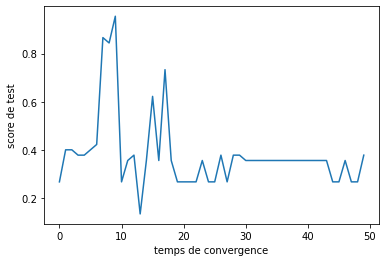

In [58]:
import matplotlib.pyplot as plt
plt.plot(range(len(dfk.loc['temps de convergence'])), dfk.loc['performances'])
#plt.plot(range(len(dfk.loc['performances'])), dfk.loc["nombre d'itérations"])
plt.xlabel("temps de convergence")
plt.ylabel('score de test')

nous avons obtenue un score de 97 % donc des resultats assez bien que celui du mlp , 

ou on a une LR trés petit (indice 1 tjrs)

#### a- adam solver

In [59]:
test_scorekk=[]
nmbr_iterationkk=[]
tempskk=[]
dictresultatkk={}
k=0
for i in dictresultat.keys(): 
    for j in range(11,1,-1):
        start_time = time.time()
        clf_adam = MLPClassifier(solver='adam', hidden_layer_sizes=(dictresultat[i]), random_state=1,learning_rate_init=j) 
        print(dictresultat[i])
        clf_adam.fit(X_train,y_train)
        clf_adam.predict(X_test)
        test_scorekk.append(clf_adam.score(X_test, y_test))
        end_time = time.time()
        print('temps ecoule = '+str(end_time - start_time))
        print(clf_adam.n_iter_)
        tempskk.append(end_time - start_time)
        nmbr_iterationkk.append(clf_adam.n_iter_)
        dictresultatkk['architecture_'+str(j)]=dictresultat[i]
        k=k+1
        print(" les valeurs des scores obtenue :" ,test_scorekk)
dictresultatkk 

[148]
temps ecoule = 0.008739709854125977
12
 les valeurs des scores obtenue : [0.8444444444444444]
[148]
temps ecoule = 0.008193016052246094
12
 les valeurs des scores obtenue : [0.8444444444444444, 0.8888888888888888]
[148]
temps ecoule = 0.008085966110229492
12
 les valeurs des scores obtenue : [0.8444444444444444, 0.8888888888888888, 0.8444444444444444]
[148]
temps ecoule = 0.008420705795288086
12
 les valeurs des scores obtenue : [0.8444444444444444, 0.8888888888888888, 0.8444444444444444, 0.8888888888888888]
[148]
temps ecoule = 0.007834672927856445
12
 les valeurs des scores obtenue : [0.8444444444444444, 0.8888888888888888, 0.8444444444444444, 0.8888888888888888, 0.8666666666666667]
[148]
temps ecoule = 0.007418155670166016
12
 les valeurs des scores obtenue : [0.8444444444444444, 0.8888888888888888, 0.8444444444444444, 0.8888888888888888, 0.8666666666666667, 0.8666666666666667]
[148]
temps ecoule = 0.0065996646881103516
12
 les valeurs des scores obtenue : [0.8444444444444444,

temps ecoule = 0.016776084899902344
12
 les valeurs des scores obtenue : [0.8444444444444444, 0.8888888888888888, 0.8444444444444444, 0.8888888888888888, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.8888888888888888, 0.8666666666666667, 0.8666666666666667, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.8222222222222222, 0.7333333333333333, 0.6222222222222222, 0.7111111111111111, 0.35555555555555557, 0.4444444444444444, 0.6222222222222222, 0.4, 0.6444444444444445, 0.7777777777777778, 0.6222222222222222]
[93, 149, 112, 138]
temps ecoule = 0.037717342376708984
12
 les valeurs des scores obtenue : [0.8444444444444444, 0.8888888888888888, 0.8444444444444444, 0.8888888888888888, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.8888888888888888, 0.8666666666666667, 0.8666666666666667, 0.8888888888888888, 0.8888888888888888, 0.8888

temps ecoule = 0.028806447982788086
12
 les valeurs des scores obtenue : [0.8444444444444444, 0.8888888888888888, 0.8444444444444444, 0.8888888888888888, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.8888888888888888, 0.8666666666666667, 0.8666666666666667, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.8222222222222222, 0.7333333333333333, 0.6222222222222222, 0.7111111111111111, 0.35555555555555557, 0.4444444444444444, 0.6222222222222222, 0.4, 0.6444444444444445, 0.7777777777777778, 0.6222222222222222, 0.9111111111111111, 0.8444444444444444, 0.8666666666666667, 0.7777777777777778, 0.8, 0.7777777777777778, 0.8666666666666667, 0.9111111111111111, 0.7333333333333333, 0.7333333333333333, 0.26666666666666666, 0.26666666666666666, 0.26666666666666666, 0.26666666666666666, 0.26666666666666666, 0.26666666666666666, 0.35555555555555557]
[66, 150

{'architecture_11': [66, 150, 14, 152, 113],
 'architecture_10': [66, 150, 14, 152, 113],
 'architecture_9': [66, 150, 14, 152, 113],
 'architecture_8': [66, 150, 14, 152, 113],
 'architecture_7': [66, 150, 14, 152, 113],
 'architecture_6': [66, 150, 14, 152, 113],
 'architecture_5': [66, 150, 14, 152, 113],
 'architecture_4': [66, 150, 14, 152, 113],
 'architecture_3': [66, 150, 14, 152, 113],
 'architecture_2': [66, 150, 14, 152, 113]}

Nous avons affiché les résultats sous forme du tableau suivant:

In [61]:
liste=[]
for i in range(1,51):
    liste.append(" model_adam_"+str(i))   
arkk = np.array([test_scorekk, nmbr_iterationkk, tempskk])
dfkk = pd.DataFrame(arkk, index = ['performances', 
    "nombre d'itérations", 'temps de convergence'], columns = liste)
dfkk

,model_adam_1,model_adam_2,model_adam_3,model_adam_4,model_adam_5,model_adam_6,model_adam_7,model_adam_8,model_adam_9,model_adam_10,...,model_adam_41,model_adam_42,model_adam_43,model_adam_44,model_adam_45,model_adam_46,model_adam_47,model_adam_48,model_adam_49,model_adam_50
performances,0.844444,0.888889,0.844444,0.888889,0.866667,0.866667,0.866667,0.888889,0.866667,0.866667,...,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,0.355556,0.266667,0.377778,0.377778
nombre d'itérations,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
temps de convergence,0.008740,0.008193,0.008086,0.008421,0.007835,0.007418,0.006600,0.006773,0.006879,0.006828,...,0.022309,0.022306,0.022383,0.022354,0.022338,0.022336,0.028806,0.036296,0.026523,0.024704


Text(0, 0.5, 'score de test')

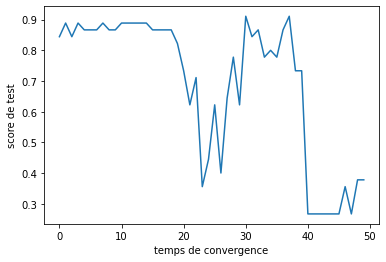

In [62]:
import matplotlib.pyplot as plt
plt.plot(range(len(dfkk.loc['temps de convergence'])), dfkk.loc['performances'])
#plt.plot(range(len(dfk.loc['performances'])), dfk.loc["nombre d'itérations"])
plt.xlabel("temps de convergence")
plt.ylabel('score de test')

pour le classiffieur adam il nous a donnée  des résultats 

beacoup mieux  pour une valeure de LR  plus elevé

#### Remarque :
    
- cas de sgd:

   -Nous avons  obtenus des resultat de score sont plus 
   
    en plus meilleur que celles du svm(m) qui a depassé 
    
    97 pourcent, mais il prend un peu plus de temps.
    
   
- cas de adam:

   -Nous avons  realisé un trés bon score qui dépasse 95 
   
     pourcent dans un court laps de temps (0.02s)


#### la meilleur architechture qu'on a obtenu:    

In [63]:
def get_the_other_components(k,j):
    dictionnaire={}
    #clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(list(dict.values())[k]), random_state=1)
    clf = MLPClassifier(solver='adam', hidden_layer_sizes=(list(dictresultat.values())[k]), random_state=1,learning_rate_init=j)
    clf.fit(X_train,y_train)
    clf.predict(X_test)
    dictionnaire['n_layers_:']=clf.n_layers_
    dictionnaire[' n_outputs_,:']=clf. n_outputs_ 
    dictionnaire['out_activation_:']=clf.out_activation_                    
    dictionnaire['coefs_:']=clf.coefs_
    dictionnaire['intercepts_:']=clf.intercepts_ 
    dictionnaire['classes_:']=clf.classes_ 
    dictionnaire[' loss_:']=clf.loss_ 
    dictionnaire['n_iter_ :']=clf.n_iter_
    
    return dictionnaire                                           
#Example                        
get_the_other_components(1,6)

{'n_layers_:': 4,
 ' n_outputs_,:': 3,
 'out_activation_:': 'softmax',
 'coefs_:': [array([[ 15.26124762,   6.62949586,   6.80201705,   5.27070518,
            6.54032508,  -2.33821296,  10.2302044 ,  19.74552033,
            3.99493411,  15.53770749,  16.03535247,  14.76831971,
            0.43874201,  -2.55118081,   0.34506054,   6.48657298,
            1.69592149,  16.61012889,  -1.4779928 ,  10.02982725,
           10.61810904, -11.97613139,   7.32747069,   8.05798675,
           16.01206217,   9.36295827,   5.93052821,   1.06430735,
          -20.84633143,  11.44929634,  14.64238579,   2.45129301,
           14.06380522,   4.15408972,   7.93781282,  -3.14266135,
           17.17638969,  26.64535091,   2.13741466,   7.27616114,
            5.37367255,   5.23754594,   7.71732889,   7.08003931,
           -0.50136124,   9.86547001,   0.83608156,   6.41494386,
            4.47814057, -21.16589566,   9.20542381,   5.93627516,
            2.97759669,  10.82813803,   4.94944466, -13.3216